In [174]:
import pandas as pd
import numpy as np

nasdaqFile = "inputFile/nasdaq.csv"
usoFile = "inputFile/uso.csv"
googFile = "inputFile/goog.csv"
xomFile = "inputFile/xom.csv"

In [175]:
def readFile(filename):
    data = pd.read_csv(filename, sep=",", usecols=[0, 6], names=['Date', 'Price'], header=0)
    # print(data.head())
    returns = np.array(data['Price'][:-1], np.float32) / np.array(data['Price'][1:], np.float32) - 1
    data["Returns"] = np.append(returns, np.nan)
    #print(data.head())
    return data

In [176]:
googData = readFile(googFile)
usoData = readFile(usoFile)
nasdaqData = readFile(nasdaqFile)
xomData = readFile(xomFile)
googData.head()


,Date,Price,Returns
0,2017-03-31,1401900,-0.161292
1,2017-04-03,1671500,0.598909
2,2017-04-04,1045400,-0.327847
3,2017-04-05,1555300,0.239876
4,2017-04-06,1254400,0.186418


In [177]:

yData = nasdaqData["Returns"][0:-1].values.reshape(-1,1)
xData = googData["Returns"][0:-1].values.reshape(-1,1)


In [178]:
yData

array([[ 0.02621078],
       [ 0.03538001],
       [-0.18763971],
       ...,
       [ 0.09196401],
       [-0.15679216],
       [ 0.21712899]])

In [179]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
goodGoogModel = linear_model.LinearRegression()
goodGoogModel.fit(xData,yData)
goodGoogModel.score(xData,yData)

0.07859341981322754

In [181]:
goodGoogModel.coef_

array([[0.24567718]])

In [182]:
goodGoogModel.intercept_

array([0.00491072])

In [183]:
goodGoogModel._residues

array([113.83499791])

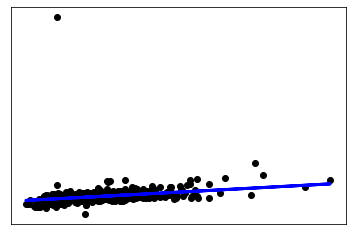

In [184]:

import matplotlib.pyplot as plt

plt.scatter(xData,yData, color="black")
plt.plot(xData,goodGoogModel.predict(xData),color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

